In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data

In [2]:
data = pd.read_csv('netflix_titles.csv')

## Exploratory Data Analysis

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
movies = data.loc[data.type == 'Movie']
print('Dataset size for Movies', movies.shape)
movies.head()

Dataset size for Movies (4265, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


In [5]:
movies.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,4.265000e+03,4265,4265,4137,3905,4070,4264,4265.000000,4257,4265,4265,4265
unique,NaN,1,4241,3198,3763,482,1045,NaN,14,186,249,4257
top,NaN,Movie,The Silence,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,TV-MA,90 min,Documentaries,A surly septuagenarian gets another chance at ...
freq,NaN,4265,3,18,10,1482,111,NaN,1348,111,299,3
mean,7.562096e+07,NaN,NaN,NaN,NaN,NaN,NaN,2012.354279,NaN,NaN,NaN,NaN
std,1.287630e+07,NaN,NaN,NaN,NaN,NaN,NaN,9.735306,NaN,NaN,NaN,NaN
min,2.477470e+05,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,NaN,NaN,NaN,NaN
25%,7.030419e+07,NaN,NaN,NaN,NaN,NaN,NaN,2012.000000,NaN,NaN,NaN,NaN
50%,8.015858e+07,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,NaN,NaN,NaN,NaN
75%,8.099157e+07,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN


## Data Cleaning
Look for and handle missing data, repeats, and outliers

In [6]:
# Need to clean up nulls, outliers, etc.

# first we'll check for null data
movies.isna().sum()

show_id           0
type              0
title             0
director        128
cast            360
country         195
date_added        1
release_year      0
rating            8
duration          0
listed_in         0
description       0
dtype: int64

In [7]:
# Because the nulls seem to be due to input error or an intentional preference not to list information in the director, cast, and country columns, we'll simply fill those values with the value 'Unlisted'
for col in ['director', 'cast', 'country']:
    movies[col] = movies[col].fillna('Unlisted')

movies.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      1
release_year    0
rating          8
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
# Since there's no way to recover the true rating for films with no rating, we'll simply fill those nulls with the included 'NR' not-rated value. This is a compromise, but won't affect our overall dataset much with only 10 values being affected.

print(movies['rating'].unique())

movies['rating'] = movies['rating'].fillna('NR')

movies.isna().sum()

['TV-PG' 'TV-MA' 'TV-14' 'R' 'TV-Y7' 'TV-Y' 'NR' 'PG-13' 'TV-G' 'PG' 'G'
 nan 'UR' 'TV-Y7-FV' 'NC-17']


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      1
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [9]:
# As for the data_added, I really can't think of a value that would accurately maintain any important information. We'll simply drop those rows

movies.dropna(inplace=True)

# Sum up all nulls in all columns of our data, should be zero now.
movies.isna().sum().sum()

0

### Look for and handle outliers

In [10]:
# Locate any outliers with a given threshold (Number of IQRs beyond 1st and 3rd quarter to consider not outliers)
threshold = 1.5

def get_minmax_with_threshold(s, threshold=1.5, range_type='iqr'):
    if range_type == 'iqr':
        q75, q25 = np.percentile(s, [75,25])
        ranged = q75 - q25
    elif range_type == 'std':
        ranged = s.std()

    min_val = q25 - (ranged*threshold)
    max_val = q75 + (ranged*threshold)
    
    return min_val, max_val
    
def get_outliers(s, threshold=1.5, range_type='iqr'):
    min_val, max_val = get_minmax_with_threshold(s, threshold, range_type=range_type)
    return s.loc[(s > max_val) | (s < min_val)]

s = pd.Series([get_outliers(movies[col], threshold).count() *100 / len(movies[col])
            for col in movies.select_dtypes(include='number').columns],
            index=movies.select_dtypes(include='number').columns)

print(s)

show_id          2.861163
release_year    11.843340
dtype: float64


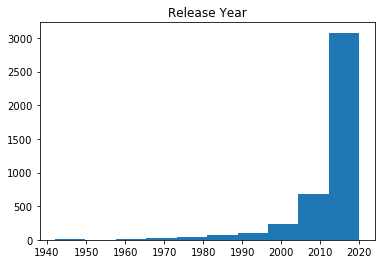

In [11]:
# Since all show_ids are unique and not ordinately meaningful, they will be ignored. We do notice about 10% of release_year values are outliers. To investigate further, we'll check out the distribution of that column

min_val, max_val = get_minmax_with_threshold(movies['release_year'], threshold)

plt.hist(movies['release_year'])
plt.title('Release Year')
plt.show()

## Feature Selection

In [12]:
cont_data = movies.select_dtypes('number')
cat_data = movies.select_dtypes('object')

In [13]:
# View an organized output of the number of unique values in each categorical column
cat_data.nunique().sort_values()

type              1
rating           14
duration        186
listed_in       249
country         483
date_added     1045
director       3199
cast           3764
title          4240
description    4256
dtype: int64

In [14]:
# Identify drop columns that are pointless to encode (This would be a little more interesting using NLP)
# Also include columns that can be manually turned into quantitative data
drop_cols = ['title', 'description', 'date_added', 'duration']

# Identify columns that won't be difficult to one-hot encode
easy_encode_cols = []

# Identify columns that will be difficult to encode because the value includes multiple values separated by commas. 
diff_encode_cols = []

for col in cat_data.drop(drop_cols, axis=1).columns:
    if cat_data[col].str.count(',').max() == 0:
        easy_encode_cols.append(col)
    else:
        diff_encode_cols.append(col)

print('Easy to encode columns:', easy_encode_cols)
print('Difficult to encode columns:', diff_encode_cols)

Easy to encode columns: ['type', 'rating']
Difficult to encode columns: ['director', 'cast', 'country', 'listed_in']


### Handle difficult to encode columns
One true value (like the actor 'Samuel L. Jackson') could occur in multiple rows with different casts. We want to be able to say that all films with Samuel L. Jackson are related, even if the rest of the cast is different.

We'll use the `.str.get_dummies()` method, using `', '` as a separator. This will create a one-hot-encoded variable for each unique value within the string of comma-combined values for each row. This may take a while to run.

While this will significantly impact our dimensionality, it will actually increase our number of columns needed to encode our data less than if we simply one-hot-encoded it as-is, yet we will retain more accurate information.

In [15]:
# Initialize a dictionary that will hold our string dummy dataframes
diff_encoded_dfs = {}

# Fill the dict with dummy encoded dataframes representing each column. 
for col in diff_encode_cols:
    diff_encoded_dfs[col] = cat_data[col].str.get_dummies(sep=', ')
    print(col)
    print(diff_encoded_dfs[col].shape)
    print(diff_encoded_dfs[col].columns)
    print('----------------------------------------------------')

########## TRY dropping the actors

######### TRY USING "POPULAR ACTORS" - ordered by number of occurrences - avg?

director
(4264, 3536)
Index(['A. L. Vijay', 'A. Salaam', 'A.R. Murugadoss', 'Aadish Keluskar',
       'Aamir Bashir', 'Aamir Khan', 'Aanand Rai', 'Aaron Burns',
       'Aaron Hancox', 'Aaron Hann',
       ...
       'Àlex Pastor', 'Álex de la Iglesia', 'Álvaro Brechner',
       'Álvaro Longoria', 'Çagan Irmak', 'Éric Warin', 'Ísold Uggadóttir',
       'Óskar Thór Axelsson', 'Ömer Faruk Sorak', 'Şenol Sönmez'],
      dtype='object', length=3536)
----------------------------------------------------
cast
(4264, 18861)
Index(['4Minute', '50 Cent', 'A. Murat Özgen', 'A.C. Peterson', 'A.D. Miles',
       'A.J. Cook', 'A.J. LoCascio', 'A.K. Hangal', 'A.R. Rahman',
       'A.S. Sasi Kumar',
       ...
       'İştar Gökseven', 'Łukasz "Lotek” Lodkowski', 'Şafak Pekdemir',
       'Şafak Sezer', 'Şebnem Bozoklu', 'Şenay Bozoklar', 'Şerif Sezer',
       'Şinasi Yurtsever', 'Şükran Ovalı', 'Şükrü Özyıldız'],
      dtype='object', length=18861)
----------------------------------------------------
co

In [16]:
actor_appear = diff_encoded_dfs['cast'].sum()
actor_appear.sort_values(ascending=False)

Unlisted             359
Anupam Kher           32
Shah Rukh Khan        30
Naseeruddin Shah      27
Om Puri               27
                    ... 
Melissa Hutchison      1
Melissa George         1
Melissa Fahn           1
Melissa Disney         1
4Minute                1
Length: 18861, dtype: int64

### Encode easy categorical columns
For the easier columns, we'll simply one-hot encode them

In [17]:
# Get dummies for all simple qualitative column categories

################################ For rating -> ordinally encode it 

easy_encoded_df = pd.get_dummies(cat_data[easy_encode_cols], drop_first=True)
print(easy_encode_cols)
print(easy_encoded_df.shape)
print(easy_encoded_df.columns)

['type', 'rating']
(4264, 13)
Index(['rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y', 'rating_TV-Y7', 'rating_TV-Y7-FV', 'rating_UR'],
      dtype='object')


### Concert some columns to numeric
#### Duration

In [18]:
# Convert the movie and series lengths to integers separately.
movie_length_mins = cat_data.loc[cat_data['type'] == 'Movie']['duration'].str.strip(' min').astype('int64')
movie_length_mins.name = 'movie_length'

(array([8.900e+01, 3.450e+02, 1.521e+03, 1.685e+03, 5.020e+02, 1.060e+02,
        1.300e+01, 2.000e+00, 0.000e+00, 1.000e+00]),
 array([  3. ,  33.9,  64.8,  95.7, 126.6, 157.5, 188.4, 219.3, 250.2,
        281.1, 312. ]),
 <a list of 10 Patch objects>)

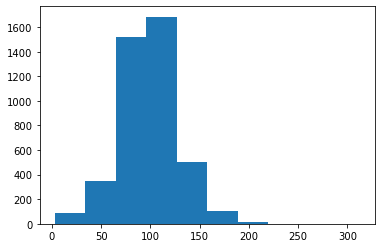

In [19]:
plt.hist(movie_length_mins)

In [20]:
# convert date added to datetime object and retain the year, since we have release year stored. 
added_year = pd.to_datetime(cat_data['date_added']).dt.year
# added_year = added_year.astype('int64') ############################# ADDD THIS BACK IN WHEN YOU FINISH NULL HANDLING
added_year.name = 'added_year'
print(added_year.shape)
added_year.isna().sum()

(4264,)


0

### Combine quantitative and qualitative features together

In [21]:
# combine the given continuous variables with the new lenghts and added_year features
quantitative_data = pd.concat([cont_data, added_year], axis=1)
print('quantitative data')
print(quantitative_data.shape)
print(quantitative_data.columns)
quantitative_data.head()

quantitative data
(4264, 3)
Index(['show_id', 'release_year', 'added_year'], dtype='object')


,show_id,release_year,added_year
0,81145628,2019,2019
1,80117401,2016,2016
4,80125979,2017,2017
6,70304989,2014,2017
7,80164077,2017,2017


In [22]:
# Combine all encoded categorical dfs
qualitative_data = easy_encoded_df.copy()
for key in diff_encoded_dfs:
    qualitative_data = pd.concat([qualitative_data, diff_encoded_dfs[key]], axis=1)
print('qualitative data')
print(qualitative_data.shape)
print(qualitative_data.columns)
qualitative_data.head()

qualitative data
(4264, 22538)
Index(['rating_NC-17', 'rating_NR', 'rating_PG', 'rating_PG-13', 'rating_R',
       'rating_TV-14', 'rating_TV-G', 'rating_TV-MA', 'rating_TV-PG',
       'rating_TV-Y',
       ...
       'Independent Movies', 'International Movies', 'LGBTQ Movies', 'Movies',
       'Music & Musicals', 'Romantic Movies', 'Sci-Fi & Fantasy',
       'Sports Movies', 'Stand-Up Comedy', 'Thrillers'],
      dtype='object', length=22538)


,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,rating_TV-MA,rating_TV-PG,rating_TV-Y,...,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
7,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [23]:
# Scale the quantitative features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_quant_data = scaler.fit_transform(quantitative_data)
quantitative_data_std = pd.DataFrame(scaled_quant_data, columns=quantitative_data.columns, index=quantitative_data.index)
quantitative_data_std

,show_id,release_year,added_year
0,0.429145,0.682740,0.836487
1,0.349289,0.374578,-1.654281
4,0.349956,0.477299,-0.824025
6,-0.412773,0.169137,-0.824025
7,0.352914,0.477299,-0.824025
...,...,...,...
5575,0.347403,0.374578,-0.824025
5577,0.346807,-0.549907,-1.654281
5578,0.346807,0.271858,-1.654281
5579,0.341092,0.169137,-1.654281


In [24]:
# Concatenate the qualitative and quantitative features together
X = pd.concat([quantitative_data_std, qualitative_data], axis=1)
X.dropna(inplace=True)
X

,show_id,release_year,added_year,rating_NC-17,rating_NR,rating_PG,rating_PG-13,rating_R,rating_TV-14,rating_TV-G,...,Independent Movies,International Movies,LGBTQ Movies,Movies,Music & Musicals,Romantic Movies,Sci-Fi & Fantasy,Sports Movies,Stand-Up Comedy,Thrillers
0,0.429145,0.682740,0.836487,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.349289,0.374578,-1.654281,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.349956,0.477299,-0.824025,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,-0.412773,0.169137,-0.824025,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,0,1
7,0.352914,0.477299,-0.824025,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5575,0.347403,0.374578,-0.824025,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
5577,0.346807,-0.549907,-1.654281,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5578,0.346807,0.271858,-1.654281,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
5579,0.341092,0.169137,-1.654281,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [60]:
import umap

umap_results = umap.UMAP(n_neighbors = 5, min_dist =.3, metric='correlation').fit_transform(X)


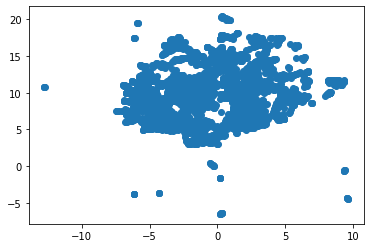

In [61]:
plt.scatter(umap_results[:,0], umap_results[:,1])

In [ ]:

umap_results = umap.UMAP(n_neighbors = 25, min_dist =.3, metric='correlation').fit_transform(X)
plt.scatter(umap_results[:,0], umap_results[:,1])
